In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as display

In [4]:
%matplotlib inline

In [305]:
df = pd.read_csv('country_vaccinations_by_manufacturer.csv')

In [306]:
display(df)

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31400
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
16704,European Union,2021-09-20,Moderna,55516105
16705,European Union,2021-09-20,Oxford/AstraZeneca,67114948
16706,European Union,2021-09-20,Pfizer/BioNTech,390594822
16707,European Union,2021-09-20,Sinopharm/Beijing,2097899


In [307]:
#df = df.drop(columns=['location'])
df.head(20)

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31400
4,Austria,2021-01-15,Johnson&Johnson,0
5,Austria,2021-01-15,Moderna,91
6,Austria,2021-01-15,Oxford/AstraZeneca,0
7,Austria,2021-01-15,Pfizer/BioNTech,116834
8,Austria,2021-01-22,Johnson&Johnson,0
9,Austria,2021-01-22,Moderna,311


In [308]:
df['location'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Finland', 'France',
       'Germany', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'United States', 'Uruguay', 'European Union'],
      dtype=object)

In [309]:
df2 = df[df['location'] == 'United States']

In [310]:
df2 = df2.drop(columns='location')
df2.reset_index(drop=True, inplace=True)

In [329]:
df2['vaccine'] = df2['vaccine'].apply(lambda x: x.replace('Johnson&Johnson', 'Johnson'))
df2['vaccine'] = df2['vaccine'].apply(lambda x: x.replace('Pfizer/BioNTech', 'Pfizer'))
df2['date'] = pd.to_datetime(df2['date'])
df2.dtypes

date                  datetime64[ns]
vaccine                       object
total_vaccinations             int64
dtype: object

TypeError: float() argument must be a string or a number, not 'Timestamp'

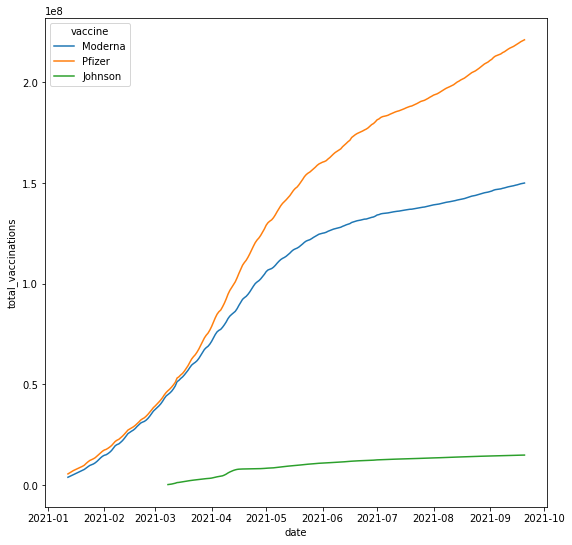

In [355]:
plt.figure(figsize=(9,9))
sns.lineplot(data=df2, x='date', y='total_vaccinations', hue='vaccine')
sns.heatmap(data=df2, x='date', y='total_vaccinations', hue='vaccine')


In [350]:
y = df2['vaccine']
df2['date'] = df2['date'].reshape(-1,1)
X = df2['date']

AttributeError: 'Series' object has no attribute 'reshape'

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [334]:
lm = LinearRegression()

In [348]:
lm.fit(X_train,y_train)
print(x.dtype)

ValueError: Expected 2D array, got 1D array instead:
array=['2021-06-05T00:00:00.000000000' '2021-07-01T00:00:00.000000000'
 '2021-09-18T00:00:00.000000000' '2021-01-12T00:00:00.000000000'
 '2021-07-13T00:00:00.000000000' '2021-01-15T00:00:00.000000000'
 '2021-04-28T00:00:00.000000000' '2021-02-04T00:00:00.000000000'
 '2021-09-16T00:00:00.000000000' '2021-06-28T00:00:00.000000000'
 '2021-08-23T00:00:00.000000000' '2021-06-19T00:00:00.000000000'
 '2021-06-11T00:00:00.000000000' '2021-01-31T00:00:00.000000000'
 '2021-06-22T00:00:00.000000000' '2021-04-03T00:00:00.000000000'
 '2021-08-18T00:00:00.000000000' '2021-03-18T00:00:00.000000000'
 '2021-04-02T00:00:00.000000000' '2021-07-15T00:00:00.000000000'
 '2021-03-21T00:00:00.000000000' '2021-09-02T00:00:00.000000000'
 '2021-02-17T00:00:00.000000000' '2021-08-27T00:00:00.000000000'
 '2021-02-13T00:00:00.000000000' '2021-08-01T00:00:00.000000000'
 '2021-07-02T00:00:00.000000000' '2021-06-22T00:00:00.000000000'
 '2021-05-06T00:00:00.000000000' '2021-03-14T00:00:00.000000000'
 '2021-07-15T00:00:00.000000000' '2021-09-09T00:00:00.000000000'
 '2021-03-18T00:00:00.000000000' '2021-05-09T00:00:00.000000000'
 '2021-03-16T00:00:00.000000000' '2021-05-24T00:00:00.000000000'
 '2021-04-18T00:00:00.000000000' '2021-05-21T00:00:00.000000000'
 '2021-03-09T00:00:00.000000000' '2021-04-19T00:00:00.000000000'
 '2021-04-11T00:00:00.000000000' '2021-04-29T00:00:00.000000000'
 '2021-08-05T00:00:00.000000000' '2021-04-18T00:00:00.000000000'
 '2021-07-31T00:00:00.000000000' '2021-07-29T00:00:00.000000000'
 '2021-09-01T00:00:00.000000000' '2021-09-11T00:00:00.000000000'
 '2021-07-11T00:00:00.000000000' '2021-09-10T00:00:00.000000000'
 '2021-05-03T00:00:00.000000000' '2021-06-28T00:00:00.000000000'
 '2021-07-28T00:00:00.000000000' '2021-06-17T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-01-25T00:00:00.000000000'
 '2021-05-20T00:00:00.000000000' '2021-07-17T00:00:00.000000000'
 '2021-08-28T00:00:00.000000000' '2021-05-11T00:00:00.000000000'
 '2021-06-03T00:00:00.000000000' '2021-08-13T00:00:00.000000000'
 '2021-03-26T00:00:00.000000000' '2021-03-28T00:00:00.000000000'
 '2021-05-17T00:00:00.000000000' '2021-07-03T00:00:00.000000000'
 '2021-02-18T00:00:00.000000000' '2021-07-28T00:00:00.000000000'
 '2021-06-22T00:00:00.000000000' '2021-07-14T00:00:00.000000000'
 '2021-06-14T00:00:00.000000000' '2021-05-22T00:00:00.000000000'
 '2021-07-19T00:00:00.000000000' '2021-07-20T00:00:00.000000000'
 '2021-03-30T00:00:00.000000000' '2021-06-18T00:00:00.000000000'
 '2021-06-04T00:00:00.000000000' '2021-04-04T00:00:00.000000000'
 '2021-03-22T00:00:00.000000000' '2021-07-03T00:00:00.000000000'
 '2021-05-13T00:00:00.000000000' '2021-07-04T00:00:00.000000000'
 '2021-09-03T00:00:00.000000000' '2021-05-18T00:00:00.000000000'
 '2021-03-05T00:00:00.000000000' '2021-01-30T00:00:00.000000000'
 '2021-09-20T00:00:00.000000000' '2021-03-15T00:00:00.000000000'
 '2021-08-27T00:00:00.000000000' '2021-08-25T00:00:00.000000000'
 '2021-07-29T00:00:00.000000000' '2021-04-06T00:00:00.000000000'
 '2021-09-08T00:00:00.000000000' '2021-03-31T00:00:00.000000000'
 '2021-01-23T00:00:00.000000000' '2021-09-12T00:00:00.000000000'
 '2021-08-06T00:00:00.000000000' '2021-04-03T00:00:00.000000000'
 '2021-03-03T00:00:00.000000000' '2021-06-08T00:00:00.000000000'
 '2021-05-16T00:00:00.000000000' '2021-07-01T00:00:00.000000000'
 '2021-08-25T00:00:00.000000000' '2021-02-20T00:00:00.000000000'
 '2021-06-28T00:00:00.000000000' '2021-04-08T00:00:00.000000000'
 '2021-04-10T00:00:00.000000000' '2021-02-05T00:00:00.000000000'
 '2021-02-21T00:00:00.000000000' '2021-06-27T00:00:00.000000000'
 '2021-02-19T00:00:00.000000000' '2021-02-06T00:00:00.000000000'
 '2021-05-11T00:00:00.000000000' '2021-08-07T00:00:00.000000000'
 '2021-04-10T00:00:00.000000000' '2021-06-13T00:00:00.000000000'
 '2021-08-05T00:00:00.000000000' '2021-08-13T00:00:00.000000000'
 '2021-03-22T00:00:00.000000000' '2021-07-22T00:00:00.000000000'
 '2021-07-19T00:00:00.000000000' '2021-03-29T00:00:00.000000000'
 '2021-09-02T00:00:00.000000000' '2021-07-10T00:00:00.000000000'
 '2021-08-08T00:00:00.000000000' '2021-08-12T00:00:00.000000000'
 '2021-02-10T00:00:00.000000000' '2021-03-18T00:00:00.000000000'
 '2021-02-07T00:00:00.000000000' '2021-06-08T00:00:00.000000000'
 '2021-03-14T00:00:00.000000000' '2021-05-18T00:00:00.000000000'
 '2021-09-01T00:00:00.000000000' '2021-07-14T00:00:00.000000000'
 '2021-04-24T00:00:00.000000000' '2021-03-26T00:00:00.000000000'
 '2021-06-01T00:00:00.000000000' '2021-08-17T00:00:00.000000000'
 '2021-03-19T00:00:00.000000000' '2021-03-28T00:00:00.000000000'
 '2021-05-26T00:00:00.000000000' '2021-04-08T00:00:00.000000000'
 '2021-04-17T00:00:00.000000000' '2021-04-17T00:00:00.000000000'
 '2021-05-04T00:00:00.000000000' '2021-04-09T00:00:00.000000000'
 '2021-01-22T00:00:00.000000000' '2021-07-30T00:00:00.000000000'
 '2021-04-20T00:00:00.000000000' '2021-04-14T00:00:00.000000000'
 '2021-03-28T00:00:00.000000000' '2021-01-24T00:00:00.000000000'
 '2021-05-12T00:00:00.000000000' '2021-03-25T00:00:00.000000000'
 '2021-04-20T00:00:00.000000000' '2021-06-20T00:00:00.000000000'
 '2021-09-16T00:00:00.000000000' '2021-01-23T00:00:00.000000000'
 '2021-05-27T00:00:00.000000000' '2021-02-22T00:00:00.000000000'
 '2021-01-19T00:00:00.000000000' '2021-08-24T00:00:00.000000000'
 '2021-06-05T00:00:00.000000000' '2021-04-09T00:00:00.000000000'
 '2021-06-29T00:00:00.000000000' '2021-03-04T00:00:00.000000000'
 '2021-07-02T00:00:00.000000000' '2021-05-28T00:00:00.000000000'
 '2021-08-02T00:00:00.000000000' '2021-07-25T00:00:00.000000000'
 '2021-08-31T00:00:00.000000000' '2021-06-19T00:00:00.000000000'
 '2021-07-22T00:00:00.000000000' '2021-04-15T00:00:00.000000000'
 '2021-01-20T00:00:00.000000000' '2021-06-12T00:00:00.000000000'
 '2021-07-18T00:00:00.000000000' '2021-09-11T00:00:00.000000000'
 '2021-05-04T00:00:00.000000000' '2021-07-12T00:00:00.000000000'
 '2021-03-29T00:00:00.000000000' '2021-05-12T00:00:00.000000000'
 '2021-03-25T00:00:00.000000000' '2021-09-03T00:00:00.000000000'
 '2021-05-14T00:00:00.000000000' '2021-07-09T00:00:00.000000000'
 '2021-07-28T00:00:00.000000000' '2021-08-04T00:00:00.000000000'
 '2021-07-12T00:00:00.000000000' '2021-04-21T00:00:00.000000000'
 '2021-03-31T00:00:00.000000000' '2021-08-22T00:00:00.000000000'
 '2021-09-09T00:00:00.000000000' '2021-02-07T00:00:00.000000000'
 '2021-05-22T00:00:00.000000000' '2021-07-16T00:00:00.000000000'
 '2021-03-12T00:00:00.000000000' '2021-06-16T00:00:00.000000000'
 '2021-03-03T00:00:00.000000000' '2021-05-06T00:00:00.000000000'
 '2021-03-16T00:00:00.000000000' '2021-02-25T00:00:00.000000000'
 '2021-06-10T00:00:00.000000000' '2021-03-30T00:00:00.000000000'
 '2021-08-18T00:00:00.000000000' '2021-08-24T00:00:00.000000000'
 '2021-09-20T00:00:00.000000000' '2021-03-19T00:00:00.000000000'
 '2021-09-17T00:00:00.000000000' '2021-06-21T00:00:00.000000000'
 '2021-06-25T00:00:00.000000000' '2021-05-17T00:00:00.000000000'
 '2021-06-13T00:00:00.000000000' '2021-01-30T00:00:00.000000000'
 '2021-06-18T00:00:00.000000000' '2021-04-05T00:00:00.000000000'
 '2021-03-08T00:00:00.000000000' '2021-07-02T00:00:00.000000000'
 '2021-04-23T00:00:00.000000000' '2021-06-29T00:00:00.000000000'
 '2021-01-29T00:00:00.000000000' '2021-08-28T00:00:00.000000000'
 '2021-08-08T00:00:00.000000000' '2021-04-30T00:00:00.000000000'
 '2021-03-27T00:00:00.000000000' '2021-04-13T00:00:00.000000000'
 '2021-01-26T00:00:00.000000000' '2021-06-26T00:00:00.000000000'
 '2021-09-19T00:00:00.000000000' '2021-05-10T00:00:00.000000000'
 '2021-07-21T00:00:00.000000000' '2021-05-23T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-09-04T00:00:00.000000000'
 '2021-06-09T00:00:00.000000000' '2021-03-15T00:00:00.000000000'
 '2021-07-16T00:00:00.000000000' '2021-07-18T00:00:00.000000000'
 '2021-07-31T00:00:00.000000000' '2021-08-29T00:00:00.000000000'
 '2021-03-14T00:00:00.000000000' '2021-08-26T00:00:00.000000000'
 '2021-08-11T00:00:00.000000000' '2021-07-30T00:00:00.000000000'
 '2021-04-27T00:00:00.000000000' '2021-09-14T00:00:00.000000000'
 '2021-04-27T00:00:00.000000000' '2021-08-06T00:00:00.000000000'
 '2021-03-19T00:00:00.000000000' '2021-08-11T00:00:00.000000000'
 '2021-05-26T00:00:00.000000000' '2021-07-01T00:00:00.000000000'
 '2021-08-26T00:00:00.000000000' '2021-06-17T00:00:00.000000000'
 '2021-02-20T00:00:00.000000000' '2021-04-26T00:00:00.000000000'
 '2021-07-08T00:00:00.000000000' '2021-03-23T00:00:00.000000000'
 '2021-04-25T00:00:00.000000000' '2021-07-26T00:00:00.000000000'
 '2021-05-30T00:00:00.000000000' '2021-04-04T00:00:00.000000000'
 '2021-08-07T00:00:00.000000000' '2021-09-18T00:00:00.000000000'
 '2021-04-17T00:00:00.000000000' '2021-09-07T00:00:00.000000000'
 '2021-05-17T00:00:00.000000000' '2021-08-23T00:00:00.000000000'
 '2021-02-28T00:00:00.000000000' '2021-08-05T00:00:00.000000000'
 '2021-03-27T00:00:00.000000000' '2021-04-02T00:00:00.000000000'
 '2021-03-10T00:00:00.000000000' '2021-04-24T00:00:00.000000000'
 '2021-04-01T00:00:00.000000000' '2021-08-19T00:00:00.000000000'
 '2021-03-13T00:00:00.000000000' '2021-05-13T00:00:00.000000000'
 '2021-02-02T00:00:00.000000000' '2021-06-30T00:00:00.000000000'
 '2021-02-03T00:00:00.000000000' '2021-02-02T00:00:00.000000000'
 '2021-01-12T00:00:00.000000000' '2021-08-01T00:00:00.000000000'
 '2021-08-11T00:00:00.000000000' '2021-05-21T00:00:00.000000000'
 '2021-09-14T00:00:00.000000000' '2021-03-08T00:00:00.000000000'
 '2021-03-24T00:00:00.000000000' '2021-08-26T00:00:00.000000000'
 '2021-05-15T00:00:00.000000000' '2021-06-10T00:00:00.000000000'
 '2021-06-06T00:00:00.000000000' '2021-08-19T00:00:00.000000000'
 '2021-05-24T00:00:00.000000000' '2021-01-21T00:00:00.000000000'
 '2021-07-06T00:00:00.000000000' '2021-09-19T00:00:00.000000000'
 '2021-04-18T00:00:00.000000000' '2021-01-28T00:00:00.000000000'
 '2021-03-29T00:00:00.000000000' '2021-06-07T00:00:00.000000000'
 '2021-08-21T00:00:00.000000000' '2021-07-25T00:00:00.000000000'
 '2021-05-14T00:00:00.000000000' '2021-06-24T00:00:00.000000000'
 '2021-07-26T00:00:00.000000000' '2021-06-03T00:00:00.000000000'
 '2021-07-17T00:00:00.000000000' '2021-04-07T00:00:00.000000000'
 '2021-04-13T00:00:00.000000000' '2021-08-25T00:00:00.000000000'
 '2021-08-20T00:00:00.000000000' '2021-09-17T00:00:00.000000000'
 '2021-03-06T00:00:00.000000000' '2021-08-19T00:00:00.000000000'
 '2021-06-09T00:00:00.000000000' '2021-01-27T00:00:00.000000000'
 '2021-05-29T00:00:00.000000000' '2021-07-27T00:00:00.000000000'
 '2021-08-22T00:00:00.000000000' '2021-03-02T00:00:00.000000000'
 '2021-02-10T00:00:00.000000000' '2021-04-21T00:00:00.000000000'
 '2021-09-12T00:00:00.000000000' '2021-01-29T00:00:00.000000000'
 '2021-07-11T00:00:00.000000000' '2021-08-16T00:00:00.000000000'
 '2021-07-17T00:00:00.000000000' '2021-08-14T00:00:00.000000000'
 '2021-03-15T00:00:00.000000000' '2021-03-06T00:00:00.000000000'
 '2021-04-07T00:00:00.000000000' '2021-09-12T00:00:00.000000000'
 '2021-07-06T00:00:00.000000000' '2021-03-22T00:00:00.000000000'
 '2021-08-10T00:00:00.000000000' '2021-03-01T00:00:00.000000000'
 '2021-06-21T00:00:00.000000000' '2021-05-03T00:00:00.000000000'
 '2021-02-16T00:00:00.000000000' '2021-07-16T00:00:00.000000000'
 '2021-02-25T00:00:00.000000000' '2021-03-17T00:00:00.000000000'
 '2021-02-19T00:00:00.000000000' '2021-03-16T00:00:00.000000000'
 '2021-04-16T00:00:00.000000000' '2021-09-16T00:00:00.000000000'
 '2021-06-15T00:00:00.000000000' '2021-05-16T00:00:00.000000000'
 '2021-05-08T00:00:00.000000000' '2021-06-07T00:00:00.000000000'
 '2021-06-18T00:00:00.000000000' '2021-05-07T00:00:00.000000000'
 '2021-06-16T00:00:00.000000000' '2021-04-28T00:00:00.000000000'
 '2021-02-11T00:00:00.000000000' '2021-08-10T00:00:00.000000000'
 '2021-08-14T00:00:00.000000000' '2021-06-03T00:00:00.000000000'
 '2021-02-27T00:00:00.000000000' '2021-04-16T00:00:00.000000000'
 '2021-05-15T00:00:00.000000000' '2021-09-17T00:00:00.000000000'
 '2021-08-03T00:00:00.000000000' '2021-06-02T00:00:00.000000000'
 '2021-03-05T00:00:00.000000000' '2021-06-11T00:00:00.000000000'
 '2021-04-28T00:00:00.000000000' '2021-04-22T00:00:00.000000000'
 '2021-08-02T00:00:00.000000000' '2021-07-09T00:00:00.000000000'
 '2021-01-26T00:00:00.000000000' '2021-08-29T00:00:00.000000000'
 '2021-03-24T00:00:00.000000000' '2021-07-11T00:00:00.000000000'
 '2021-07-24T00:00:00.000000000' '2021-08-09T00:00:00.000000000'
 '2021-02-08T00:00:00.000000000' '2021-07-08T00:00:00.000000000'
 '2021-07-04T00:00:00.000000000' '2021-04-19T00:00:00.000000000'
 '2021-04-12T00:00:00.000000000' '2021-04-25T00:00:00.000000000'
 '2021-06-02T00:00:00.000000000' '2021-02-21T00:00:00.000000000'
 '2021-06-05T00:00:00.000000000' '2021-04-20T00:00:00.000000000'
 '2021-03-09T00:00:00.000000000' '2021-05-01T00:00:00.000000000'
 '2021-04-09T00:00:00.000000000' '2021-07-23T00:00:00.000000000'
 '2021-04-27T00:00:00.000000000' '2021-07-30T00:00:00.000000000'
 '2021-05-14T00:00:00.000000000' '2021-05-27T00:00:00.000000000'
 '2021-01-13T00:00:00.000000000' '2021-08-03T00:00:00.000000000'
 '2021-08-30T00:00:00.000000000' '2021-07-14T00:00:00.000000000'
 '2021-06-15T00:00:00.000000000' '2021-07-23T00:00:00.000000000'
 '2021-03-04T00:00:00.000000000' '2021-09-10T00:00:00.000000000'
 '2021-08-13T00:00:00.000000000' '2021-09-04T00:00:00.000000000'
 '2021-06-12T00:00:00.000000000' '2021-03-20T00:00:00.000000000'
 '2021-04-15T00:00:00.000000000' '2021-02-08T00:00:00.000000000'
 '2021-08-29T00:00:00.000000000' '2021-06-09T00:00:00.000000000'
 '2021-05-05T00:00:00.000000000' '2021-09-03T00:00:00.000000000'
 '2021-07-21T00:00:00.000000000' '2021-01-21T00:00:00.000000000'
 '2021-08-04T00:00:00.000000000' '2021-06-23T00:00:00.000000000'
 '2021-07-20T00:00:00.000000000' '2021-09-13T00:00:00.000000000'
 '2021-07-09T00:00:00.000000000' '2021-04-11T00:00:00.000000000'
 '2021-05-04T00:00:00.000000000' '2021-03-21T00:00:00.000000000'
 '2021-06-04T00:00:00.000000000' '2021-09-02T00:00:00.000000000'
 '2021-07-25T00:00:00.000000000' '2021-05-13T00:00:00.000000000'
 '2021-09-07T00:00:00.000000000' '2021-05-22T00:00:00.000000000'
 '2021-09-11T00:00:00.000000000' '2021-06-17T00:00:00.000000000'
 '2021-09-08T00:00:00.000000000' '2021-05-23T00:00:00.000000000'
 '2021-05-11T00:00:00.000000000' '2021-08-28T00:00:00.000000000'
 '2021-06-30T00:00:00.000000000' '2021-06-29T00:00:00.000000000'
 '2021-07-27T00:00:00.000000000' '2021-05-08T00:00:00.000000000'
 '2021-03-07T00:00:00.000000000' '2021-08-15T00:00:00.000000000'
 '2021-05-01T00:00:00.000000000' '2021-04-23T00:00:00.000000000'
 '2021-07-07T00:00:00.000000000' '2021-07-22T00:00:00.000000000'
 '2021-03-09T00:00:00.000000000' '2021-05-28T00:00:00.000000000'
 '2021-08-30T00:00:00.000000000' '2021-02-24T00:00:00.000000000'
 '2021-09-07T00:00:00.000000000' '2021-05-05T00:00:00.000000000'
 '2021-04-26T00:00:00.000000000' '2021-08-09T00:00:00.000000000'
 '2021-06-23T00:00:00.000000000' '2021-02-14T00:00:00.000000000'
 '2021-06-07T00:00:00.000000000' '2021-03-20T00:00:00.000000000'
 '2021-07-23T00:00:00.000000000' '2021-08-31T00:00:00.000000000'
 '2021-02-09T00:00:00.000000000' '2021-02-05T00:00:00.000000000'
 '2021-07-13T00:00:00.000000000' '2021-01-15T00:00:00.000000000'
 '2021-03-11T00:00:00.000000000' '2021-05-19T00:00:00.000000000'
 '2021-09-20T00:00:00.000000000' '2021-09-09T00:00:00.000000000'
 '2021-08-07T00:00:00.000000000' '2021-06-14T00:00:00.000000000'
 '2021-02-23T00:00:00.000000000' '2021-08-23T00:00:00.000000000'
 '2021-08-15T00:00:00.000000000' '2021-05-26T00:00:00.000000000'
 '2021-07-29T00:00:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [290]:
df3 = pd.read_csv('country_vaccinations.csv')

In [291]:
df3

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45979,Zimbabwe,ZWE,2021-09-16,4964302.0,2930550.0,2033752.0,108486.0,51755.0,32.89,19.42,13.48,3429.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
45980,Zimbabwe,ZWE,2021-09-17,NaN,NaN,NaN,NaN,45993.0,NaN,NaN,NaN,3047.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
45981,Zimbabwe,ZWE,2021-09-18,4992501.0,2940750.0,2051751.0,NaN,40514.0,33.08,19.49,13.59,2684.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
45982,Zimbabwe,ZWE,2021-09-19,5015041.0,2948725.0,2066316.0,22540.0,40630.0,33.23,19.54,13.69,2692.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [250]:
df3 = df3[df3['country'] == 'United States']

In [251]:

df3.reset_index(drop=True, inplace=True)
df3.head(30)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
1,United States,USA,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,172.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
2,United States,USA,2020-12-22,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,379.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
3,United States,USA,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,448.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
4,United States,USA,2020-12-24,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,568.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
5,United States,USA,2020-12-25,NaN,NaN,NaN,NaN,215238.0,NaN,NaN,NaN,640.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
6,United States,USA,2020-12-26,1944585.0,1944585.0,NaN,NaN,231396.0,0.58,0.58,NaN,688.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
7,United States,USA,2020-12-27,NaN,NaN,NaN,NaN,211379.0,NaN,NaN,NaN,628.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
8,United States,USA,2020-12-28,2127143.0,2127143.0,NaN,NaN,216147.0,0.63,0.63,NaN,643.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...
9,United States,USA,2020-12-29,NaN,NaN,NaN,NaN,235685.0,NaN,NaN,NaN,701.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...


In [252]:
#df3.info()

In [253]:
#df3.describe

In [254]:
df3 = df3.drop(columns=['source_website','source_name','vaccines','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
                    'daily_vaccinations_per_million','iso_code'])
df3

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations
0,United States,2020-12-20,556208.0,556208.0,NaN,NaN,NaN
1,United States,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0
2,United States,2020-12-22,NaN,NaN,NaN,NaN,127432.0
3,United States,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0
4,United States,2020-12-24,NaN,NaN,NaN,NaN,191001.0
...,...,...,...,...,...,...,...
270,United States,2021-09-16,383038403.0,210700361.0,180086143.0,743608.0,773763.0
271,United States,2021-09-17,383994877.0,211097597.0,180572171.0,956474.0,775023.0
272,United States,2021-09-18,384911290.0,211489242.0,181035022.0,916413.0,777010.0
273,United States,2021-09-19,385586012.0,211776515.0,181382976.0,674722.0,763444.0


In [256]:
#df3 = df3.fillna(df3.mean(skipna=True))

In [257]:
df3 = df3.astype({'country':'str', 'total_vaccinations':'int64',
                  'people_vaccinated':'int64', 'people_fully_vaccinated':'int64',
                  'daily_vaccinations_raw':'int64', 'daily_vaccinations':'int64'})

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [241]:
df3.loc[:, 'date'] = pd.to_datetime(df.loc[:, 'date']

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations
0,United States,2020-12-20,556208,556208,104478499,1516709,1400649
1,United States,2020-12-21,614117,614117,104478499,57909,57909
2,United States,2020-12-22,220810599,128115760,104478499,1516709,127432
3,United States,2020-12-23,1008025,1008025,104478499,1516709,150606
4,United States,2020-12-24,220810599,128115760,104478499,1516709,191001
...,...,...,...,...,...,...,...
270,United States,2021-09-16,383038403,210700361,180086143,743608,773763
271,United States,2021-09-17,383994877,211097597,180572171,956474,775023
272,United States,2021-09-18,384911290,211489242,181035022,916413,777010
273,United States,2021-09-19,385586012,211776515,181382976,674722,763444


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

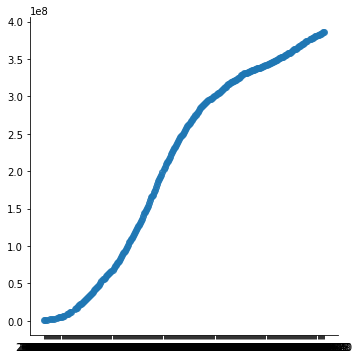

In [262]:
sns.lmplot(x='date',y='total_vaccinations', data=df3)

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations
0,United States,2020-12-20,556208.0,556208.0,NaN,NaN,NaN
1,United States,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0
2,United States,2020-12-22,NaN,NaN,NaN,NaN,127432.0
3,United States,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0
4,United States,2020-12-24,NaN,NaN,NaN,NaN,191001.0
...,...,...,...,...,...,...,...
270,United States,2021-09-16,383038403.0,210700361.0,180086143.0,743608.0,773763.0
271,United States,2021-09-17,383994877.0,211097597.0,180572171.0,956474.0,775023.0
272,United States,2021-09-18,384911290.0,211489242.0,181035022.0,916413.0,777010.0
273,United States,2021-09-19,385586012.0,211776515.0,181382976.0,674722.0,763444.0
